In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

## Reading of data

In [2]:
data = pd.read_csv("WPI all comodities.csv",parse_dates=True)
data

,Date,Combined
0,2013-01-01,108.0
1,2013-02-01,108.4
2,2013-03-01,108.6
3,2013-04-01,108.6
4,2013-05-01,108.6
...,...,...
108,2022-01-01,143.8
109,2022-02-01,145.3
110,2022-03-01,148.9
111,2022-04-01,151.9


In [3]:
data.isna().sum()

Date        0
Combined    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      113 non-null    object 
 1   Combined  113 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [5]:
data["Date"] = pd.to_datetime(data["Date"])
data["Date"]

0     2013-01-01
1     2013-02-01
2     2013-03-01
3     2013-04-01
4     2013-05-01
         ...    
108   2022-01-01
109   2022-02-01
110   2022-03-01
111   2022-04-01
112   2022-05-01
Name: Date, Length: 113, dtype: datetime64[ns]

In [6]:
data

,Date,Combined
0,2013-01-01,108.0
1,2013-02-01,108.4
2,2013-03-01,108.6
3,2013-04-01,108.6
4,2013-05-01,108.6
...,...,...
108,2022-01-01,143.8
109,2022-02-01,145.3
110,2022-03-01,148.9
111,2022-04-01,151.9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      113 non-null    datetime64[ns]
 1   Combined  113 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 KB


In [8]:
data.set_index("Date",inplace = True)

In [9]:
data   # calling date as an index

,Combined
Date,
2013-01-01,108.0
2013-02-01,108.4
2013-03-01,108.6
2013-04-01,108.6
2013-05-01,108.6
...,...
2022-01-01,143.8
2022-02-01,145.3
2022-03-01,148.9


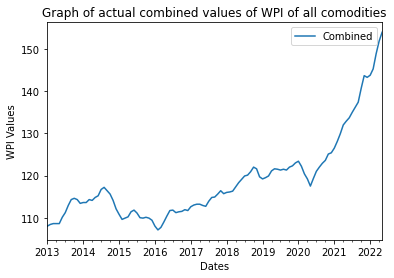

In [10]:
data.plot()
plt.title('Graph of actual combined values of WPI of all comodities')
plt.xlabel('Dates')
plt.ylabel('WPI Values')
plt.show()

## Checking whether the data is stationary or not

In [11]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data)
adftest

(2.708523248464259,
 0.999087421434621,
 2,
 110,
 {'1%': -3.4912451337340342,
  '5%': -2.8881954545454547,
  '10%': -2.5809876033057852},
 243.2099294491078)

ADF: 1.123480477030908
p value:0.9954121199565441
no of lags: 10
no of obs used for ADF Regression and critical values calculation: 102
critical values: '1%': -3.4961490537199116,
  '5%': -2.8903209639580556,
  '10%': -2.5821223452518263

In [12]:
print(" pvalue of adfuller test is:", adftest[1])

 pvalue of adfuller test is: 0.999087421434621


If p value <=0.05 then we reject null hypothesis(data is stationary)

here p-value is greater than 0.05 so we accept null hypothesis (data is not stationary) 

### To make data stationary

In [13]:
data["Combined first difference"]=data-data.shift(1)
data

,Combined,Combined first difference
Date,,
2013-01-01,108.0,NaN
2013-02-01,108.4,0.4
2013-03-01,108.6,0.2
2013-04-01,108.6,0.0
2013-05-01,108.6,0.0
...,...,...
2022-01-01,143.8,0.5
2022-02-01,145.3,1.5
2022-03-01,148.9,3.6


In [14]:
adftest = adfuller(data["Combined first difference"].dropna())
adftest

(-5.049780665493513,
 1.767264930433065e-05,
 1,
 110,
 {'1%': -3.4912451337340342,
  '5%': -2.8881954545454547,
  '10%': -2.5809876033057852},
 248.1793848062802)

Now data is stationary

In [15]:
data["Combined 12 difference"] = data['Combined']-data['Combined'].shift(12)
data["Combined 12 difference"]

Date
2013-01-01     NaN
2013-02-01     NaN
2013-03-01     NaN
2013-04-01     NaN
2013-05-01     NaN
              ... 
2022-01-01    17.3
2022-02-01    17.2
2022-03-01    19.0
2022-04-01    19.9
2022-05-01    21.1
Name: Combined 12 difference, Length: 113, dtype: float64

## ACF and PACF Graph

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

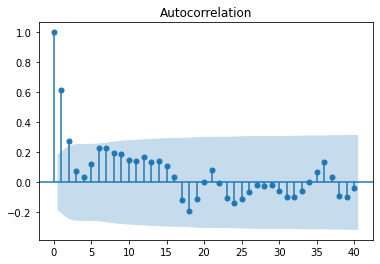

In [17]:
#fig = plt.figure(figsize=(12,8))
acf = plot_acf(data["Combined first difference"].dropna(),lags=40)

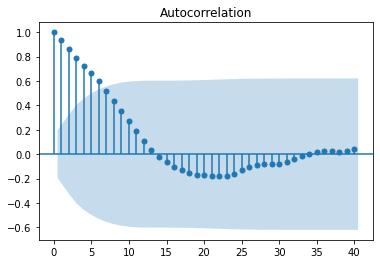

In [18]:
acf12 = plot_acf(data["Combined 12 difference"].dropna(),lags=40)

from acf12_second graph we get the value of q = 6

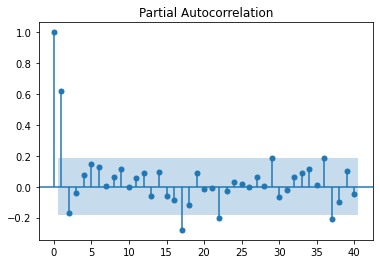

In [19]:
pacf = plot_pacf(data["Combined first difference"].dropna(),lags=40)

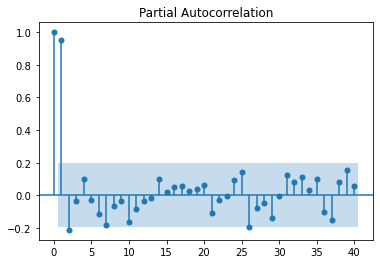

In [20]:
pacf12 = plot_pacf(data["Combined 12 difference"].dropna(),lags=40)

From PACF we get the value of p = 3

## Sarima model fitting

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [22]:
model_SARIMA = SARIMAX(data["Combined"],order=(3,1,3),seasonal_order = (3,0,3,12))

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [23]:
model_SARIMA_fit = model_SARIMA.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Combined   No. Observations:                  113
Model:             SARIMAX(3, 1, 3)x(3, 0, 3, 12)   Log Likelihood                -130.121
Date:                            Fri, 26 Aug 2022   AIC                            286.242
Time:                                    14:39:10   BIC                            321.582
Sample:                                01-01-2013   HQIC                           300.580
                                     - 05-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5753      1.853      0.310      0.756      -3.057       4.207
ar.L2          0.9649      1.199      0.805      0.421      -1.385       3.315
ar.L3         -0.5416      0.956     -0.567      0.571      -2.415       1.332
ma.L1          0.1736     15.071      0.012      0.991     -29.365      29.713
ma.L2         -0.9837     17.743     -0.055      0.956     -35.758      33.791
ma.L3         -0.1897      2.941     -0.065      0.949      -5.954       5.575
ar.S.L12       0.5610      0.389      1.442      0.149      -0.201       1.324
ar.S.L24      -0.6325      0.447     -1.414      0.157      -1.509       0.244
ar.S.L36       0.7166      0.405      1.768      0.077      -0.078       1.511
ma.S.L12      -0.4162      0.457     -0.910      0.363      -1.312       0.480
ma.S.L24       0.5365      0.597      0.898      0.369      -0.634       1.707
ma.S.L36      -0.3655      0.506     -0.722      0.470      -1.357       0.626
sigma2         0.5484      7.321      0.075      0.940     -13.801      14.898
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                12.39
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               2.37   Skew:                             0.63
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Prediction of combined value

In [25]:
from datetime import datetime,timedelta
data['pred_Sarima'] = model_SARIMA_fit.predict(start = datetime(2013,1,1),end = datetime(2022,4,1))
data['pred_Sarima']


Date
2013-01-01      0.000000
2013-02-01    108.000088
2013-03-01    108.663691
2013-04-01    108.696740
2013-05-01    108.580249
                 ...    
2022-01-01    143.174115
2022-02-01    144.471015
2022-03-01    146.634405
2022-04-01    151.874416
2022-05-01           NaN
Name: pred_Sarima, Length: 113, dtype: float64

## Residuals

In [26]:
data['residuals'] = data["Combined"]-data['pred_Sarima']
data['residuals']

Date
2013-01-01    108.000000
2013-02-01      0.399912
2013-03-01     -0.063691
2013-04-01     -0.096740
2013-05-01      0.019751
                 ...    
2022-01-01      0.625885
2022-02-01      0.828985
2022-03-01      2.265595
2022-04-01      0.025584
2022-05-01           NaN
Name: residuals, Length: 113, dtype: float64

In [27]:
data

,Combined,Combined first difference,Combined 12 difference,pred_Sarima,residuals
Date,,,,,
2013-01-01,108.0,NaN,NaN,0.000000,108.000000
2013-02-01,108.4,0.4,NaN,108.000088,0.399912
2013-03-01,108.6,0.2,NaN,108.663691,-0.063691
2013-04-01,108.6,0.0,NaN,108.696740,-0.096740
2013-05-01,108.6,0.0,NaN,108.580249,0.019751
...,...,...,...,...,...
2022-01-01,143.8,0.5,17.3,143.174115,0.625885
2022-02-01,145.3,1.5,17.2,144.471015,0.828985
2022-03-01,148.9,3.6,19.0,146.634405,2.265595


<AxesSubplot:ylabel='Density'>

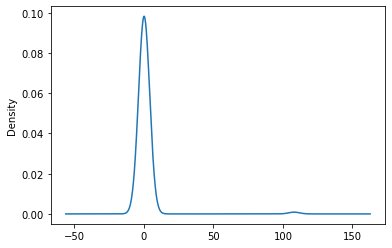

In [28]:
model_SARIMA_fit.resid.plot(kind = "kde")

In [29]:
from scipy import stats
stats.shapiro(data["residuals"])

ShapiroResult(statistic=nan, pvalue=1.0)

p value greater than 0.05 means accept null hypothesis. 

Our null hypothesis : data is from normal distribution 

here Our pvalue is 1.0

so residuals are normally distributed

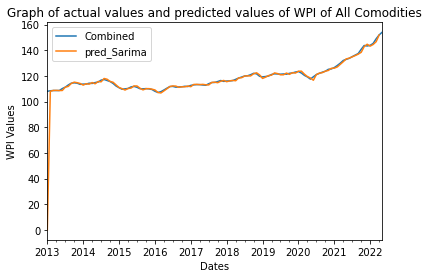

In [30]:
data[['Combined','pred_Sarima']].plot()
plt.title('Graph of actual values and predicted values of WPI of All Comodities')
plt.xlabel('Dates')
plt.ylabel('WPI Values')
plt.show()

#### Original dataset and our predicted values are nearby same

## Future prediction from May 2022 to May 2023

In [31]:
pred_Sarima2 = model_SARIMA_fit.predict(start = datetime(2022,5,1),end = datetime(2023,5,1))
pred_Sarima2

2022-05-01    153.732409
2022-06-01    154.946565
2022-07-01    155.443287
2022-08-01    155.661762
2022-09-01    155.863749
2022-10-01    156.656049
2022-11-01    156.892669
2022-12-01    156.619281
2023-01-01    156.358944
2023-02-01    156.054558
2023-03-01    156.082270
2023-04-01    156.387869
2023-05-01    156.355714
Freq: MS, Name: predicted_mean, dtype: float64

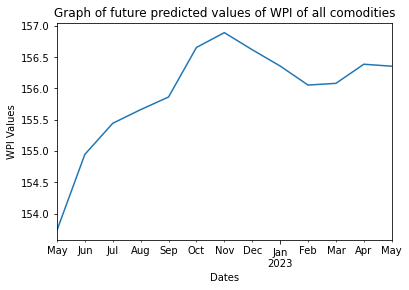

In [32]:
pred_Sarima2.plot()
plt.title('Graph of future predicted values of WPI of all comodities')
plt.xlabel('Dates')
plt.ylabel('WPI Values')
plt.show()